# Cuadro Resumen: Elección de Pruebas Estadísticas


## Preguntas Previas a Elegir una Prueba
1. **¿Cuál es la naturaleza de los datos?** (Continuos, ordinales, nominales).

2. **¿Los datos cumplen los supuestos de normalidad?** (Verificar con pruebas como Shapiro-Wilk o Kolmogorov-Smirnov).

3. **¿Las varianzas son iguales entre los grupos?** (Prueba de Levene o Bartlett).

4. **¿Cuál es la pregunta de investigación?** (Comparación de medias, correlación, asociación, etc.).

5. **¿Cuántos grupos o variables se están comparando?**





## Gráficos Relevantes
### 1. Histograma de los Datos
Un histograma muestra la distribución de los datos y ayuda a identificar visualmente si se asemejan a una distribución normal.


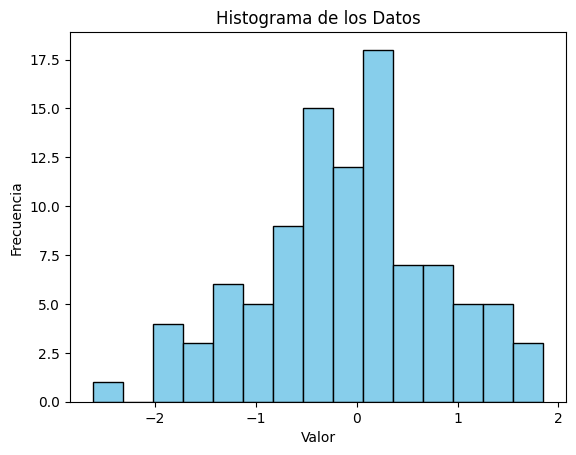

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos simulados
np.random.seed(42)
datos = np.random.normal(0, 1, 100)

# Crear histograma
plt.hist(datos, bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de los Datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


### 2. Gráfico Q-Q (Quantile-Quantile)
El gráfico Q-Q compara los cuantiles de los datos con los cuantiles de una distribución normal.



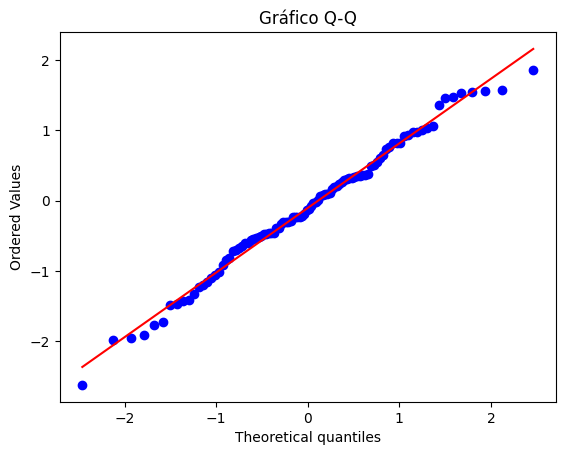

In [50]:
import scipy.stats as stats

# Crear gráfico Q-Q
stats.probplot(datos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

### 3. Boxplot
El boxplot ayuda a detectar la simetría de los datos y la presencia de valores atípicos.

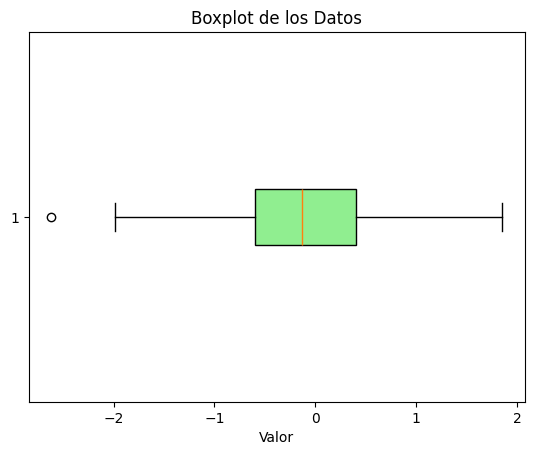

In [51]:
# Crear boxplot
plt.boxplot(datos, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot de los Datos')
plt.xlabel('Valor')
plt.show()

## Reglas de decisión

La **hipótesis nula (H₀)** se acepta (o más precisamente, **no se rechaza**) cuando no se encuentra suficiente evidencia estadística para rechazarla. Esto ocurre en los siguientes casos:

### General:
- El valor **p** obtenido en la prueba estadística es **mayor o igual** al nivel de significancia predefinido (\(\alpha\)).
  - Ejemplo: Si \(\alpha = 0.05\), no se rechaza H₀ si \(p \geq 0.05\).

### Interpretación:
1. **Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, etc.**  
   - **No se rechaza H₀:** Los datos no muestran diferencias significativas con una distribución normal.
   - **Conclusión:** Los datos **podrían ser normales** dentro del nivel de confianza.

2. **Pruebas de comparación (t-test, ANOVA, etc.):**
   - **No se rechaza H₀:** No se encuentran diferencias estadísticamente significativas entre los grupos o condiciones evaluadas.
   - **Conclusión:** Las medias de los grupos podrían ser iguales.

3. **Pruebas de correlación (Pearson, Spearman, etc.):**
   - **No se rechaza H₀:** No se encuentra evidencia de una relación lineal o monotónica significativa entre las variables.
   - **Conclusión:** Las variables podrían no estar relacionadas.

### Importante:
1. **No rechazar H₀ no implica que sea verdadera**, solo que no hay suficiente evidencia para rechazarla. Esto puede deberse a factores como tamaño de muestra pequeño, variabilidad alta, o bajo poder estadístico.
2. **Evaluar complementos visuales:** Histogramas, gráficos Q-Q, y boxplots son útiles para interpretar los resultados y evitar decisiones exclusivamente basadas en p-valores. 

Si necesitas ejemplos más específicos para cada caso, puedo incluirlos con sus resultados esperados.

# Cuadro Resumen: Evaluación de Normalidad


| Prueba                     | ¿Cuándo Usarla?                                | Supuestos                          | Descripción                                       | Hipótesis Nula (H₀)                               | Tipo de Variables Requeridas            |
|----------------------------|----------------------------------------------------|-------------------------------------|-----------------------------------------------------|---------------------------------------------------|------------------------------------------|
| **Shapiro-Wilk**           | Tamaños de muestra pequeños a moderados (<50)       | Datos independientes               | Evalúa si los datos se distribuyen normalmente     | Los datos provienen de una distribución normal (H₀). | Variable continua                         |
| **Kolmogorov-Smirnov**     | Cualquier tamaño de muestra                        | Distribución teórica especificada | Compara la distribución de los datos con la normal  | Los datos no difieren de la distribución normal (H₀). | Variable continua                         |
| **Anderson-Darling**       | Tamaños de muestra pequeños a moderados             | Datos independientes               | Mide cuánto se desvía la distribución de la normal | Los datos provienen de una distribución normal (H₀). | Variable continua                         |
| **Prueba de D’Agostino**     | Muestras de tamaño moderado a grande (>50)           | Datos independientes               | Evalúa asimetría y curtosis                       | Los datos provienen de una distribución normal (H₀). | Variable continua                         |
| **Jarque-Bera**            | Datos grandes o regresión lineal                  | Datos independientes               | Basada en asimetría y curtosis                      | Los datos tienen asimetría y curtosis de una normal (H₀). | Variable continua                         |

## Notas Importantes
1. **Visualización previa:** Usar histogramas, Q-Q plots o boxplots para evaluar preliminarmente la distribución de los datos.
2. **Pruebas de normalidad son sensibles al tamaño de muestra:** Con muestras grandes, pequeñas desviaciones de la normalidad pueden dar lugar a resultados significativos.
3. Siempre complementar los resultados con métricas descriptivas como asimetría y curtosis.


In [52]:
from scipy.stats import shapiro, anderson, normaltest, jarque_bera, kstest

def seleccionar_prueba_normalidad(datos):
    """
    Selecciona y realiza la prueba de normalidad adecuada según el tamaño de muestra.

    Args:
        datos (list or array): Datos a evaluar.

    Returns:
        dict: Resultados de la prueba seleccionada.
    """
    n = len(datos)
    resultados = {}

    if n < 50:
        # Pruebas para tamaños pequeños a moderados
        resultados['Shapiro-Wilk'] = shapiro(datos)
        resultados['Anderson-Darling'] = anderson(datos).statistic
    else:
        # Pruebas para tamaños moderados a grandes
        resultados['D’Agostino'] = normaltest(datos)
        resultados['Jarque-Bera'] = jarque_bera(datos)
    
    # Prueba aplicable a cualquier tamaño de muestra
    resultados['Kolmogorov-Smirnov'] = kstest(datos, 'norm')

    return resultados

# Ejemplo de uso

datos = np.random.normal(0, 1, 100)  # Datos simulados
resultados = seleccionar_prueba_normalidad(datos)
for prueba, resultado in resultados.items():
    print(f"{prueba}: {resultado}")


D’Agostino: NormaltestResult(statistic=np.float64(2.6599721025976133), pvalue=np.float64(0.2644809504398436))
Jarque-Bera: SignificanceResult(statistic=np.float64(2.42505305943258), pvalue=np.float64(0.2974448260902167))
Kolmogorov-Smirnov: KstestResult(statistic=np.float64(0.06588861567996473), pvalue=np.float64(0.7528697706803194), statistic_location=np.float64(0.8563987943234723), statistic_sign=np.int8(1))



## Cuadro Resumen: Pruebas Paramétricas y No Paramétricas

| Tipo de Análisis            | Pregunta Común                           | Supuestos Paramétricos              | Prueba Paramétrica              | Prueba No Paramétrica                     | Hipótesis Nula (H₀)                                             |
|-----------------------------|------------------------------------------|--------------------------------------|----------------------------------|-------------------------------------------|------------------------------------------------------------------|
| **Comparar una media con un valor fijo** | ¿La media difiere de un valor específico? | Normalidad de los datos             | Prueba t de una muestra         | Prueba de signos o Wilcoxon para una muestra | La media es igual al valor específico (H₀: μ = valor esperado). |
| **Comparar dos grupos independientes** | ¿Las medias de dos grupos son diferentes? | Normalidad, varianzas iguales       | Prueba t independiente          | Mann-Whitney U                              | Las medias de los dos grupos son iguales (H₀: μ₁ = μ₂).        |
| **Comparar dos grupos relacionados**   | ¿El cambio en las medias es significativo? | Normalidad de las diferencias       | Prueba t pareada                | Wilcoxon pareado                            | Las medias antes y después son iguales (H₀: μd = 0).           |
| **Comparar más de dos grupos**         | ¿Hay diferencias significativas entre grupos? | Normalidad, varianzas iguales       | ANOVA                          | Kruskal-Wallis                              | Las medias de todos los grupos son iguales (H₀: μ₁ = μ₂ = μ₃). |
| **Evaluar relaciones entre variables** | ¿Existe una relación lineal?             | Normalidad, relación lineal         | Correlación de Pearson          | Correlación de Spearman                     | No hay relación lineal entre las variables (H₀: ρ = 0).        |
| **Evaluar asociaciones entre categorías** | ¿Hay asociación entre variables categóricas? | Frecuencias esperadas > 5           | Prueba Chi-cuadrado            | Prueba exacta de Fisher                     | Las variables categóricas son independientes (H₀: sin asociación). |


## Notas Importantes
1. **Pruebas paramétricas** suelen ser más potentes si se cumplen los supuestos.

2. **Pruebas no paramétricas** son más robustas cuando los datos no cumplen con normalidad o igualdad de varianzas.

3. Antes de realizar cualquier prueba, explorar visualmente los datos puede ayudar a identificar patrones o violaciones de supuestos.

4. Si hay duda entre dos pruebas, realizar ambas y comparar resultados puede ser útil, pero interpretar siempre con cautela.

